# Clone my driving behavior

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Lambda
from livelossplot import PlotLossesKeras

In [30]:
user = !whoami
user = user[0]

In [37]:
IMAGE_SHAPE = (160, 320, 3)
PROJECT_DIR = '/home/ubuntu/cloning' if user == 'ubuntu' else '/home/mariosk/Desktop/autonomous_driving/CarND-Behavioral-Cloning-P3'

## Load images and measurements

In [38]:
driving_log = (
    pd.read_csv(
        './my-videos/first_drives/driving_log.csv', 
        header=None,
        names=[
            'center_image', 'left_image', 'right_image', 
            'steering_angle', 'throttle', 'break', 'speed'])
    .assign(center_image=lambda df: PROJECT_DIR + "/my-videos/first_drives/" + df["center_image"].str.split("/").str[7:].str.join("/")))

In [39]:
%%time
raw_images = np.stack(driving_log['center_image'].map(plt.imread), axis=0)
flipped_images = np.flip(raw_images, axis=2)

images = np.vstack([raw_images, flipped_images]) 

CPU times: user 2.42 s, sys: 280 ms, total: 2.7 s
Wall time: 2.7 s


In [40]:
raw_measurements = driving_log['steering_angle']
measurements_flipped = - raw_measurements

measurements = np.hstack([raw_measurements, measurements_flipped])

## Define model

In [19]:
model = Sequential([
    Lambda(lambda x: x / 255.0 - 0.5, input_shape=IMAGE_SHAPE),
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 156, 316, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 158, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 394368)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 394369    
Total params: 396,801
Trainable params: 396,801
Non-trainable params: 0
_________________________________________________________________


## Train model

In [21]:
model.fit(
    images, 
    measurements, 
    epochs=1,
    validation_split=0.2, 
    shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 2574 samples, validate on 644 samples
Epoch 1/1
2574/2574 [==============================] - 58s 23ms/step - loss: 10.5045 - val_loss: 0.0285


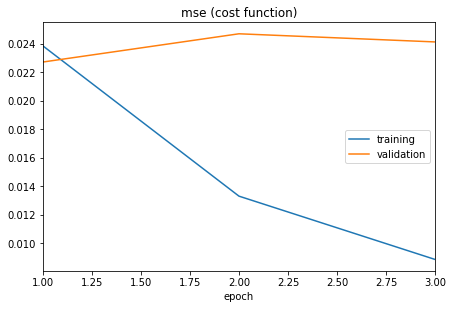

mse (cost function):
training   (min:    0.009, max:    0.024, cur:    0.009)
validation (min:    0.023, max:    0.025, cur:    0.024)


In [41]:
model.fit(
    images, 
    measurements, 
    epochs=3,
    callbacks=[PlotLossesKeras()],
    validation_split=0.2, 
    shuffle=True)

In [54]:
model.save('./models/model_flipped_images.h5a')